# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


1. Find the linear regression equation for mileage vs price.

In [4]:
X=df[['Mileage']]
Y=df['Price']

In [5]:
model=LinearRegression()

In [6]:
model.fit(X,Y)

LinearRegression()

In [7]:
m=model.coef_
c=model.intercept_

In [8]:
print('The equation of Linear Regression is: y=',m,'x+',c)

The equation of Linear Regression is: y= [-0.1725205] x+ 24764.559006061685


2. Chart the original data and the equation on the chart.

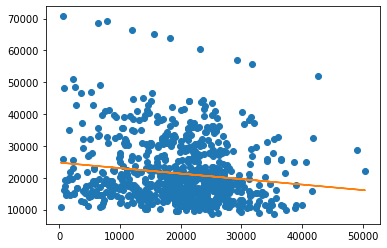

In [9]:
plt.plot(X,Y,'o')
plt.plot(X,model.predict(X))

3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [10]:
score=model.score(X,Y)*100
score

2.046344732348926

Since the score is very low the equation is not a good fit for the data

## Tasks, Part 2
1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [11]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [12]:
X=df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
Y=df['Price']

In [13]:
model.fit(X,Y)
m=model.coef_
c=model.intercept_
print('The equation of Linear Regression is : y=',m,'x+',c)

The equation of Linear Regression is : y= [-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03] x+ 6758.755143598108


2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [15]:
X1=df[['Mileage']]
X2=df[['Cylinder']]
X3=df[['Liter']]
X4=df[['Doors']]
X5=df[['Cruise']]
X6=df[['Sound']]
X7=df[['Leather']]
Y=df['Price']

In [16]:
model.fit(X,Y)
print('Score :',model.score(X,Y)*100)
model.fit(X1,Y)
print('Mileage Score :',model.score(X1,Y)*100)
model.fit(X2,Y)
print('Cylinder Score :',model.score(X2,Y)*100)
model.fit(X3,Y)
print('Liter Score :',model.score(X3,Y)*100)
model.fit(X4,Y)
print('Doors Score :',model.score(X4,Y)*100)
model.fit(X5,Y)
print('Cruise Score :',model.score(X5,Y)*100)
model.fit(X6,Y)
print('Sound Score :',model.score(X6,Y)*100)
model.fit(X7,Y)
print('Leather Score :',model.score(X7,Y)*100)

Score : 44.62643536728381
Mileage Score : 2.046344732348926
Cylinder Score : 32.385903759512246
Liter Score : 31.152674427904515
Doors Score : 1.9251466591467037
Cruise Score : 18.56330092969275
Sound Score : 1.5462387624189167
Leather Score : 2.4710851264124534


Cylinder provides the best score

3. Find the combination of the factors that is the best predictor for price.

Cylinder and Liter are the bestcombination of factors to predict the price

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.


In [17]:
df = pd.get_dummies(df,columns=['Make','Model','Type'])

In [18]:
df

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,L300 Sedan 4D,6,3.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


2. Find the best combination of factors to predict price.

Cylinder and Liter are the bestcombination of factors to predict the price